In [1]:
import os
import numpy as np
from PIL import Image
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import cv2

# Initialize face recognizer
recognizer = cv2.face.LBPHFaceRecognizer_create()

# Initialize the face detector
detector = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')



In [2]:
def getImagesAndLabels(subfolders, dataset_path):
    faceSamples = []
    ids = []

    for folder_name in subfolders:
        folder_path = os.path.join(dataset_path, folder_name)
        
        if os.path.isdir(folder_path):
            id = int(folder_name.replace('s', ''))

            for image_name in os.listdir(folder_path):
                if image_name.endswith('.pgm'):
                    imagePath = os.path.join(folder_path, image_name)
#                     print("Processing image:", imagePath)

                    # Load and convert image to grayscale
                    PIL_img = Image.open(imagePath).convert('L')
                    img_numpy = np.array(PIL_img, 'uint8')

                    # Detect faces in the image
                    faces = detector.detectMultiScale(img_numpy)
                    for (x, y, w, h) in faces:
                        faceSamples.append(img_numpy[y:y+h, x:x+w])
                        ids.append(id)

    return faceSamples, ids



In [3]:
# Define the subfolders to use for training and testing
train_subfolders = [f's{i}' for i in range(1, 37)] 
test_subfolders = [f's{i}' for i in range(20, 39)]  
# train_subfolders = [f's{i}' for i in range(1, 21)] 
# test_subfolders = [f's{i}' for i in range(15, 22)]  

dataset_path = 'dataset'  #att_faces

# Load training data
print("\n[INFO] Loading training data...")
train_faces, train_ids = getImagesAndLabels(train_subfolders, dataset_path)

# Train the model
print("\n[INFO] Training the model...")
recognizer.train(train_faces, np.array(train_ids))

# Save the trained model
model_save_dir = 'trainer'
if not os.path.exists(model_save_dir):
    os.makedirs(model_save_dir)
recognizer.write(os.path.join(model_save_dir, 'trainer.yml'))

# Load testing data
print("\n[INFO] Loading testing data...")
test_faces, test_ids = getImagesAndLabels(test_subfolders, dataset_path)

# Predict on test data
predictions = []
for face in test_faces:
    label, confidence = recognizer.predict(face)
    predictions.append(label)

# Calculate metrics
accuracy = accuracy_score(test_ids, predictions)
precision = precision_score(test_ids, predictions, average='weighted', zero_division=0)
recall = recall_score(test_ids, predictions, average='weighted', zero_division=0)
f1 = f1_score(test_ids, predictions, average='weighted', zero_division=0)

# Print metrics
print("\n[INFO] Evaluation Results:")
print("Accuracy: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1 Score: {:.2f}".format(f1))



[INFO] Loading training data...

[INFO] Training the model...

[INFO] Loading testing data...

[INFO] Evaluation Results:
Accuracy: 0.88
Precision: 0.83
Recall: 0.88
F1 Score: 0.85


In [4]:
# Predict on test data
predictions = []
for face in test_faces:
    label, confidence = recognizer.predict(face)
    predictions.append(label)

# Print predictions and true IDs
print("Predicted labels:", predictions)
print("True IDs:", test_ids)


Predicted labels: [20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 25, 25, 25, 25, 25, 25, 25, 26, 26, 26, 26, 26, 26, 26, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 28, 28, 28, 28, 28, 28, 28, 28, 28, 29, 29, 29, 29, 29, 29, 29, 29, 29, 30, 30, 30, 30, 30, 30, 30, 30, 30, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 32, 32, 32, 32, 32, 32, 32, 32, 32, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 34, 34, 34, 34, 34, 34, 34, 35, 35, 35, 35, 35, 35, 35, 36, 36, 36, 36, 36, 36, 36, 36, 36, 28, 28, 32, 28, 28, 31, 28, 28, 31, 28, 4, 23, 23, 23, 4, 4, 4, 23, 4, 23]
True IDs: [20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 25, 25, 25, 25, 25, 25, 25, 26, 26, 26, 26, 26, 26, 26, 27, 27, 27, 27, 27, 27, 27,

In [6]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


predicted_labels = [20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 25, 25, 25, 25, 25, 25, 25, 26, 26, 26, 26, 26, 26, 26, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 28, 28, 28, 28, 28, 28, 28, 28, 28, 29, 29, 29, 29, 29, 29, 29, 29, 29, 30, 30, 30, 30, 30, 30, 30, 30, 30, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 32, 32, 32, 32, 32, 32, 32, 32, 32, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 34, 34, 34, 34, 34, 34, 34, 35, 35, 35, 35, 35, 35, 35, 36, 36, 36, 36, 36, 36, 36, 36, 36, 28, 28, 32, 28, 28, 31, 28, 28, 31, 28, 4, 23, 23, 23, 4, 4, 4, 23, 4, 23]
true_labels = [20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 25, 25, 25, 25, 25, 25, 25, 26, 26, 26, 26, 26, 26, 26, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 28, 28, 28, 28, 28, 28, 28, 28, 28, 29, 29, 29, 29, 29, 29, 29, 29, 29, 30, 30, 30, 30, 30, 30, 30, 30, 30, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 32, 32, 32, 32, 32, 32, 32, 32, 32, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 34, 34, 34, 34, 34, 34, 34, 35, 35, 35, 35, 35, 35, 35, 36, 36, 36, 36, 36, 36, 36, 36, 36, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38]

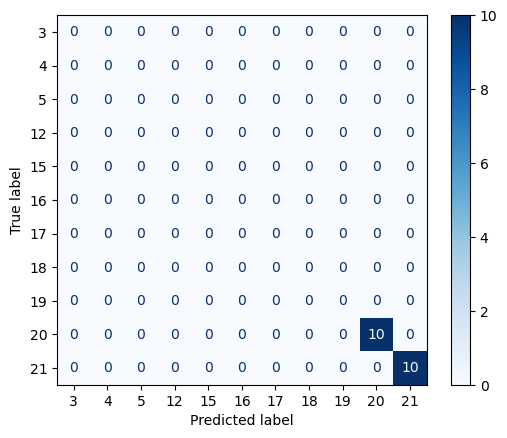

In [7]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Your labels
# predicted_labels = [15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 12, 4, 12, 12, 12, 3, 3, 4, 5, 17]
# true_labels = [15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21]

# Define all possible labels (including those that might not be predicted or true in your current data)
all_labels = [3, 4, 5, 12, 15, 16, 17, 18, 19, 20, 21]

# Generate the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels, labels=all_labels)

# Display the confusion matrix with specified labels
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=all_labels)
disp.plot(cmap=plt.cm.Blues)
plt.show()
